In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.options.display.max_columns = 40
crime_data = pd.read_csv('http://cluster.earlham.edu/~apc0013/Chicago_crime.csv')
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,831,8.0,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,1231,12.0,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,825,8.0,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,1932,19.0,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,2332,19.0,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


In [3]:
# Converting the datatype to DATETIME for manipulation
crime_data['Date'] = pd.to_datetime(crime_data.Date, format="%m/%d/%Y %I:%M:%S %p")

In [4]:
# Splitting the date by Month and Hour
# The hour ignores the minutes
crime_data['month'] = crime_data['Date'].dt.month
crime_data['time'] = crime_data['Date'].dt.hour

Text(0,0.5,'Frequency')

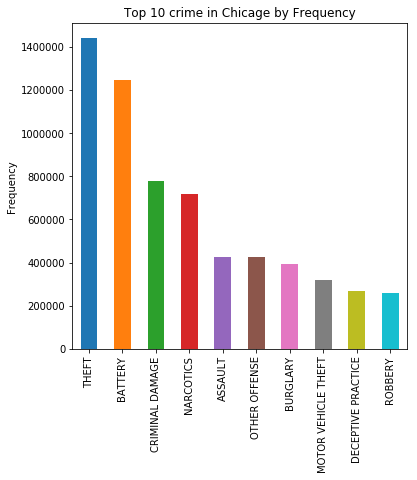

In [5]:
fig = plt.figure(figsize= (6,6))
ax = fig.gca()
topTen = crime_data['Primary Type'].value_counts().head(10)
topTen.plot(kind = 'bar', ax=ax)
ax.set_title('Top 10 crime in Chicage by Frequency')
ax.set_ylabel('Frequency')

In [6]:
# Grouped the data by Year so we can do a Year by Year analusis on Primary Types of Theft
x = crime_data.groupby('Year')['Primary Type'].value_counts().to_frame()
x.rename(columns= {'Primary Type': 'Count'}, inplace=True)
x.reset_index(inplace=True)
x.head()

,Year,Primary Type,Count
0,2001,THEFT,99264
1,2001,BATTERY,93446
2,2001,CRIMINAL DAMAGE,55851
3,2001,NARCOTICS,50567
4,2001,ASSAULT,31384


/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Text(0,0.5,'Frequency')

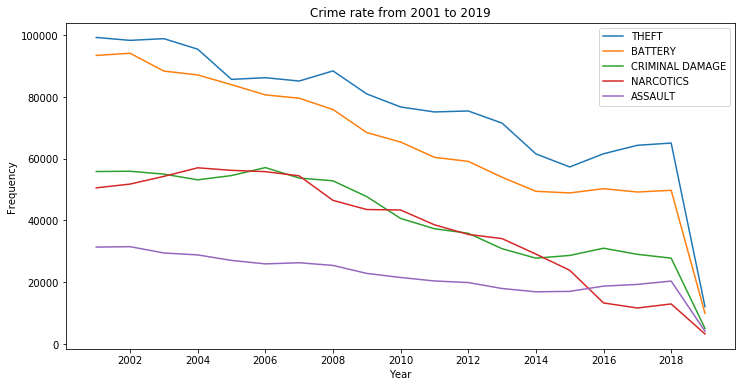

In [7]:
fig = plt.figure(figsize= (12,6))
ax = fig.gca()
theft = x[x['Primary Type']=='THEFT']
theft.rename(columns={'Count': 'THEFT'}, inplace= True)
battery = x[x['Primary Type']=='BATTERY']
battery.rename(columns={'Count': 'BATTERY'}, inplace= True)
crim = x[x['Primary Type']=='CRIMINAL DAMAGE']
crim.rename(columns={'Count': 'CRIMINAL DAMAGE'}, inplace= True)
narc = x[x['Primary Type']=='NARCOTICS']
narc.rename(columns={'Count': 'NARCOTICS'}, inplace= True)
assault = x[x['Primary Type']=='ASSAULT']
assault.rename(columns={'Count': 'ASSAULT'}, inplace= True)
theft.plot(kind = 'line', x = 'Year', y = 'THEFT', ax=ax,xticks=[2000,2002,2004,2006,2008,2010,2012,2014,2016, 2018,2020])
battery.plot(kind = 'line', x = 'Year', y = 'BATTERY', ax=ax)
crim.plot(kind = 'line', x = 'Year', y = 'CRIMINAL DAMAGE', ax=ax)
narc.plot(kind = 'line', x = 'Year', y = 'NARCOTICS', ax=ax)
assault.plot(kind = 'line', x = 'Year', y = 'ASSAULT', ax=ax)
ax.set_title('Crime rate from 2001 to 2019')
ax.set_ylabel('Frequency')

In [8]:
# we see about 40% arrest rate overall

old = crime_data[crime_data['Year']<2018]
old['Arrest'].value_counts()

False    4691142
True     1826871
Name: Arrest, dtype: int64

In [9]:
# In 2019, arrest rate is below 25%

recent = crime_data[crime_data['Year']>2017]
recent['Arrest'].value_counts()

False    254149
True      63861
Name: Arrest, dtype: int64

In [10]:
# A month by Month analysis of all the criminal activities in Chicago

month = crime_data.groupby('month')['month'].value_counts().to_frame()
month.rename(columns={'month':'Count'},inplace=True)
month.reset_index(level=0, inplace=True)
month.reset_index(drop=True)
month.head()

,month,Count
month,,
1,1,547596
2,2,481763
3,3,572515
4,4,559129
5,5,603145


Text(0.5,1,'Criminal Activity by Month')

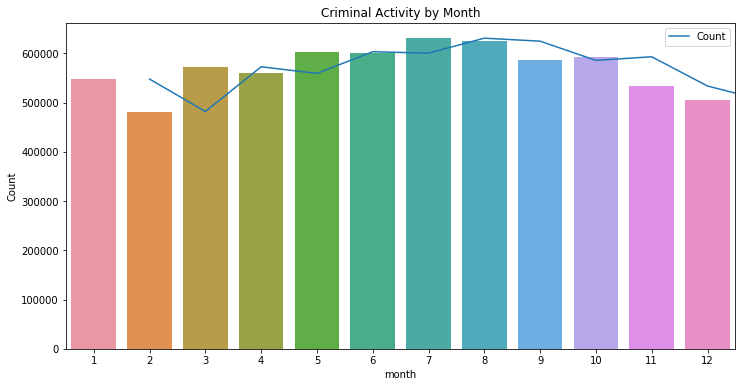

In [11]:
fig = plt.figure(figsize= (12,6))
ax = fig.gca()
sns.barplot(data = month, x = 'month', y = 'Count',ax=ax)
month.plot(kind='line', x = 'month', y = 'Count',ax=ax)
ax.set_title('Criminal Activity by Month')

In [12]:
# Analysis of all the criminal activities in Chicago by the Hour

time = crime_data.groupby('time')['time'].value_counts().to_frame()
time.rename(columns={'time':'Count'},inplace=True)
time.reset_index(level=0, inplace=True)
time.reset_index(drop=True)
time['time'] = time.replace(to_replace= 0 , value= 24)
time.sort_values(by = ['time'], inplace=True, ascending=True)
time.head()

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 'time' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


,time,Count
time,,
1,1,216571
2,2,181731
3,3,146428
4,4,110274
5,5,91518


Text(0.5,1,'Criminal Activity by the hour')

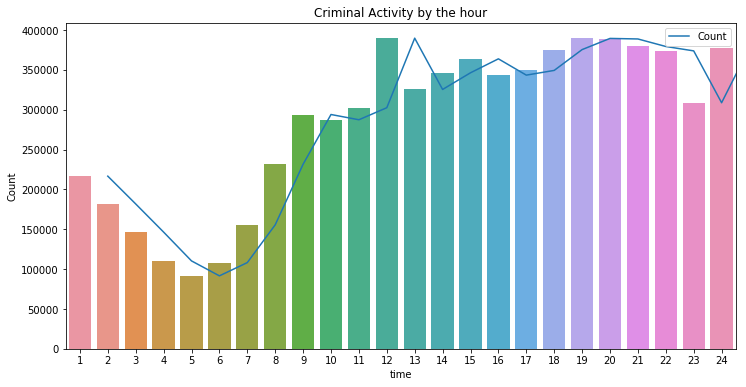

In [13]:
fig = plt.figure(figsize= (12,6))
ax = fig.gca()
time.plot(kind='line', x = 'time', y = 'Count',ax=ax)
sns.barplot(data = time, x = 'time', y = 'Count',ax=ax)
# sns.lineplot(data = time, x = 'time', y = 'Count',ax=ax)
ax.set_title('Criminal Activity by the hour')

In [14]:
# Most Dangerous Location to be in by the Hour

timeloc = crime_data.groupby(['time'])['Location Description'].value_counts().to_frame()
timeloc.rename(columns = {'Location Description': 'Count'}, inplace = True)
timeloc.reset_index(inplace = True)
timeloc.drop_duplicates(subset='time', inplace=True )

In [15]:
timeloc

,time,Location Description,Count
0,0,STREET,113259
128,1,STREET,69150
256,2,STREET,56921
388,3,STREET,44636
517,4,STREET,32784
641,5,STREET,26190
767,6,STREET,30020
889,7,STREET,40605
1008,8,STREET,51340
1137,9,RESIDENCE,74095


In [16]:
# What location is the most Primary type of Crime (THEFT) happening?

thefttt = crime_data[crime_data['Primary Type']=='THEFT']
thefttt['Location Description'].value_counts().head(10)

STREET                            393297
RESIDENCE                         150489
OTHER                              82079
PARKING LOT/GARAGE(NON.RESID.)     72662
DEPARTMENT STORE                   70542
APARTMENT                          69966
SMALL RETAIL STORE                 68651
GROCERY FOOD STORE                 56920
SIDEWALK                           45920
RESTAURANT                         40547
Name: Location Description, dtype: int64

In [17]:
# Likelihood of getting Arrested for the top 20 crime types in Chicago

true = crime_data[crime_data['Arrest']==True]
false = crime_data[crime_data['Arrest']==False]
arrestt = crime_data['Primary Type'].value_counts().head(20).to_frame()
tru = true['Primary Type'].value_counts().to_frame()
fals = false['Primary Type'].value_counts().to_frame()

In [42]:
# Percentage of People getting arrested for these crimes

arrested_development = pd.merge(arrestt, tru, how= 'left', left_index= True, right_index=True)
arrested_development = pd.merge(arrested_development, fals, how= 'left', left_index= True, right_index=True)
arrested_development.rename(columns={'Primary Type_x':'Total','Primary Type_y':'Arrested','Primary Type': 'Not Arrested'}, inplace=True)
arrested_development['Percentage Arrested'] = (arrested_development['Arrested']/arrested_development['Total'])*100
arrested_development.reset_index(inplace=True)
arrested_development.rename(columns={'index': 'Primary Type'}, inplace=True)
arrested_development.sort_values(by=['Percentage Arrested'],inplace=True, ascending = False)
arrested_development

,Primary Type,Total,Arrested,Not Arrested,Percentage Arrested
12,PROSTITUTION,68549,68282,267,99.610498
3,NARCOTICS,716044,711834,4210,99.412047
18,GAMBLING,14437,14332,105,99.272702
19,LIQUOR LAW VIOLATION,14125,13998,127,99.100885
17,INTERFERENCE WITH PUBLIC OFFICER,15584,14310,1274,91.824949
11,WEAPONS VIOLATION,72568,57531,15037,79.278745
10,CRIMINAL TRESPASS,195678,142952,52726,73.054712
13,PUBLIC PEACE VIOLATION,48274,31008,17266,64.233335
16,SEX OFFENSE,25563,7777,17786,30.422877
4,ASSAULT,425168,97987,327181,23.046654


Text(0.5,1,'Percntage of cases where the convict got Arrested')

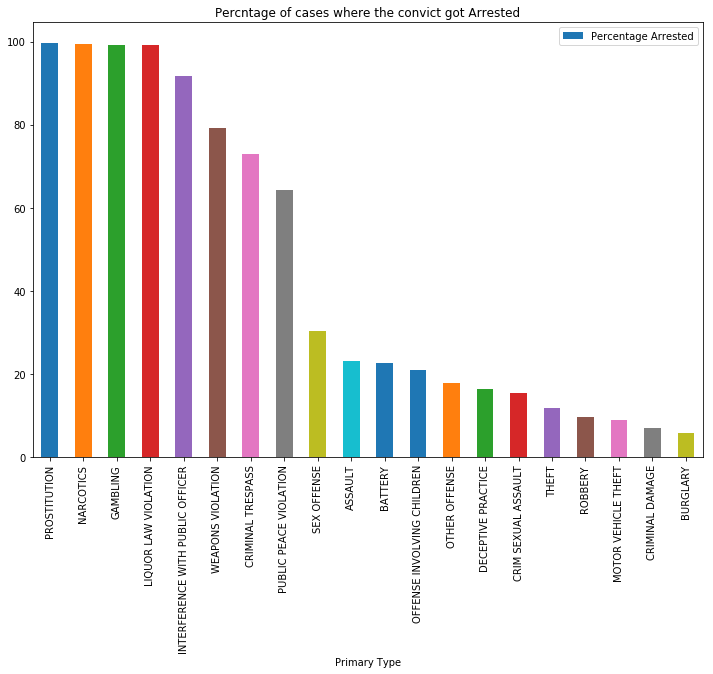

In [43]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
arrested_development.plot(kind = 'bar',x = 'Primary Type', y ='Percentage Arrested', ax=ax)
ax.set_title("Percntage of cases where the convict got Arrested")


In [44]:
arrested_development.reset_index(inplace=True)

Text(0.5,0,'Number of Instances')

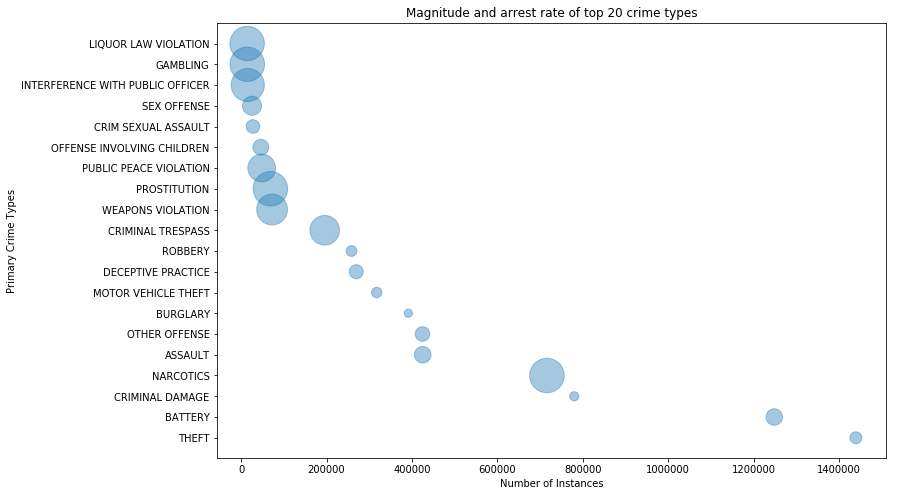

In [83]:
# Comparing Arrest Rate and frequency of Crime for top 20 crime types.

fig = plt.figure(figsize=(12,8))
ax = fig.gca()
arrested_development.plot(kind = 'scatter', y = 'index', x = 'Total', ax=ax, alpha = 0.4, s = 12*arrested_development['Percentage Arrested'])
label = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'ROBBERY', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'PROSTITUTION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'GAMBLING',
       'LIQUOR LAW VIOLATION']
ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
ax.set_yticklabels(label)
ax.set_title("Magnitude and arrest rate of top 20 crime types")
ax.set_ylabel('Primary Crime Types')
ax.set_xlabel('Number of Instances')
